## **Importation des biblioth√©ques**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
import re
import datetime
import warnings
import string

## **Chargement de Dataset**

In [2]:
# Pour cette d√©mo, on charge juste une partie du dataset (pour aller plus vite)
url ="/content/training.1600000.processed.noemoticon.csv"
data = pd.read_csv(url, encoding="ISO-8859-1", header=None)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
import os
import pandas as pd

# D√©finir le dossier o√π le CSV est (dans ton cas Colab, le fichier est d√©j√† l√†)
extract_path = "/content"  # ton CSV est directement upload√© ici
csv_file_path = os.path.join(extract_path, 'training.1600000.processed.noemoticon.csv')

# Colonnes du dataset
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Charger juste une partie du dataset (ex. 10000 lignes pour aller plus vite)
df = pd.read_csv(
    csv_file_path,
    encoding='latin-1',
    names=column_names
)

# Afficher les premi√®res lignes
df.head()


target         ids                          date      flag             user                                               text
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton  is upset that he can't update his Facebook by ...
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus  @Kenichan I dived many times for the ball. Man...
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF    my whole body feels itchy and like its on fire 
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli  @nationwideclass no, it's not behaving at all....

In [5]:
print(f"Ce dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Ce dataframe contient 1600000 lignes et 6 colonnes.


# **Exploration des donn√©es**

## **Informations g√©n√©rales sur le jeu de donn√©es**

In [6]:
def afficher_info_generales(df):
    """Affiche les informations g√©n√©rales sur le DataFrame"""
    print("1. APER√áU G√âN√âRAL DU JEU DE DONN√âES")
    print("-" * 50)
    print(f"Nombre total d'entr√©es: {df.shape[0]:,}")
    print(f"Nombre de colonnes: {df.shape[1]}")
    print("\nColonnes pr√©sentes:")
    for col in df.columns:
        print(f"- {col}")

    print("\nTypes de donn√©es:")
    print(df.dtypes)

    print("\nValeurs manquantes par colonne:")
    print(df.isnull().sum())

    # V√©rifier les doublons
    duplicates = df.duplicated().sum()
    print(f"\nNombre de lignes dupliqu√©es: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

afficher_info_generales(df)

1. APER√áU G√âN√âRAL DU JEU DE DONN√âES
--------------------------------------------------
Nombre total d'entr√©es: 1,600,000
Nombre de colonnes: 6

Colonnes pr√©sentes:
- target
- ids
- date
- flag
- user
- text

Types de donn√©es:
target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

Valeurs manquantes par colonne:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

Nombre de lignes dupliqu√©es: 0 (0.00%)


## **Analyse de la distribution des sentiments**

In [7]:
def analyser_distribution_sentiment(df):
    """Analyse la distribution des sentiments"""
    print("\n2. Distribution des sentiments (cible)")
    print("-" * 50)

    # Convertir les codes (0, 4) en cat√©gories (n√©gatif, positif)
    sentiment_map = {0: 'N√©gatif', 2: 'Neutre', 4: 'Positif'}
    df['sentiment'] = df['target'].map(sentiment_map)

    # Afficher le compte
    sentiment_counts = df['sentiment'].value_counts()
    print(sentiment_counts)
    print("\nPourcentage par cat√©gorie:")
    print(df['sentiment'].value_counts(normalize=True).map(lambda x: f"{x*100:.2f}%"))

    # Visualiser la distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sentiment', hue='sentiment', data=df, palette='viridis')
    plt.title('Distribution des Sentiments', fontsize=15)
    plt.xlabel('Sentiment')
    plt.ylabel('Nombre de Tweets')
    plt.tight_layout()
    plt.show()

analyser_distribution_sentiment(df)


2. Distribution des sentiments (cible)
--------------------------------------------------
sentiment
N√©gatif    800000
Positif    800000
Name: count, dtype: int64

Pourcentage par cat√©gorie:
sentiment
N√©gatif    50.00%
Positif    50.00%
Name: proportion, dtype: object


## **Analyse temporelle**


ANALYSE TEMPORELLE PAR MOIS
--------------------------------------------------


/tmp/ipython-input-3256508536.py:11: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_obj'] = pd.to_datetime(df['date'], errors='coerce')


P√©riode couverte: de 2009-04-06 22:19:45 √† 2009-06-25 10:28:31


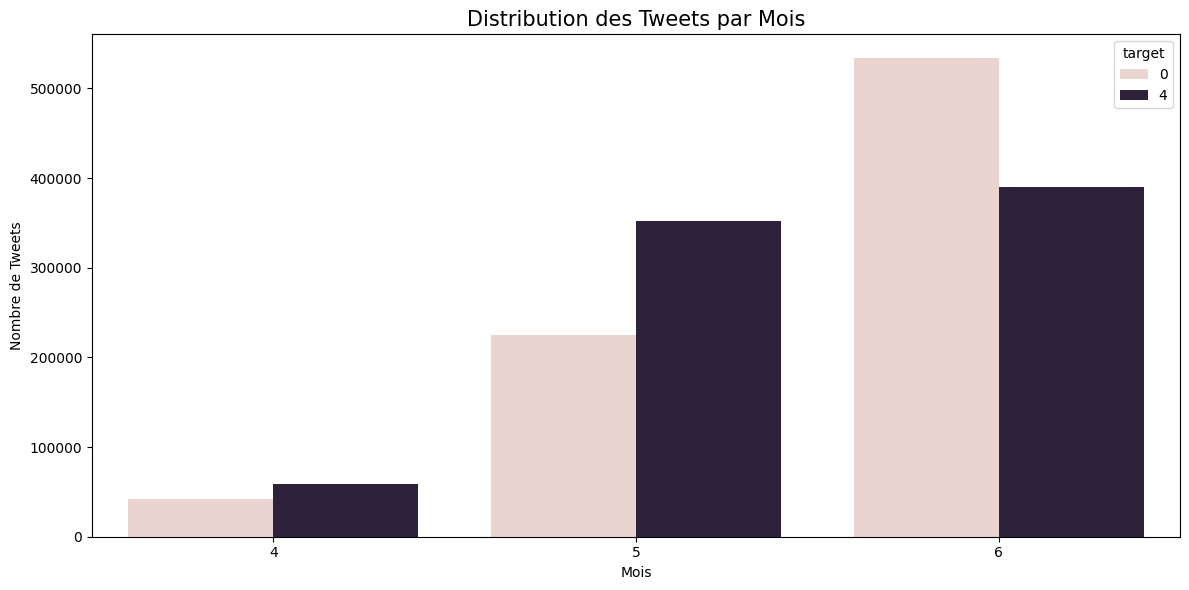

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyser_temporalite_par_mois(df):
    """Analyse la distribution temporelle des tweets par mois uniquement"""
    print("\nANALYSE TEMPORELLE PAR MOIS")
    print("-" * 50)

    # Convertir la colonne 'date' en datetime
    df['date_obj'] = pd.to_datetime(df['date'], errors='coerce')

    # Extraire le mois et l'ann√©e pour regrouper
    df['month'] = df['date_obj'].dt.month
    df['year'] = df['date_obj'].dt.year

    # Afficher la p√©riode couverte
    print(f"P√©riode couverte: de {df['date_obj'].min()} √† {df['date_obj'].max()}")

    # Distribution par mois et par sentiment
    monthly_counts = df.groupby(['year', 'month', 'target']).size().reset_index(name='count')

    plt.figure(figsize=(12, 6))
    sns.barplot(x='month', y='count', hue='target', data=monthly_counts)
    plt.title('Distribution des Tweets par Mois', fontsize=15)
    plt.xlabel('Mois')
    plt.ylabel('Nombre de Tweets')
    plt.tight_layout()
    plt.show()
analyser_temporalite_par_mois(df)

**Nettoyage des donn√©es**

In [9]:
!pip install emoji --upgrade


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 608.4/608.4 kB 5.2 MB/s eta 0:00:00


In [10]:
import re
import string
import emoji

# Fonction pour nettoyer le texte
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)            # URLs
    text = re.sub(r"@\w+", "", text)               # mentions
    text = re.sub(r"#\w+", "", text)               # hashtags
    text = re.sub(rf"[{string.punctuation}]", "", text)  # ponctuation
    text = re.sub(r"\d+", "", text)                # nombres
    text = emoji.replace_emoji(text, replace="")   # emojis
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Appliquer le nettoyage sur la colonne 'text' du DataFrame df
df["clean_text"] = df["text"].apply(clean_text)

# V√©rifier les premi√®res lignes
df.head()


target         ids                          date      flag             user                                               text sentiment            date_obj  month  year                                         clean_text
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   N√©gatif 2009-04-06 22:19:45      4  2009  awww thats a bummer you shoulda got david carr...
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton  is upset that he can't update his Facebook by ...   N√©gatif 2009-04-06 22:19:49      4  2009  is upset that he cant update his facebook by t...
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus  @Kenichan I dived many times for the ball. Man...   N√©gatif 2009-04-06 22:19:53      4  2009  i dived many times for the ball managed to sav...
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF    my whole body feels itchy and like its on fire    N√©gatif 2009-04-06 22:19:57      4  2009     my whole body feels itchy and like its on fire
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli  @nationwideclass no, it's not behaving at all....   N√©gatif 2009-04-06 22:19:57      4  2009  no its not behaving at all im mad why am i her...

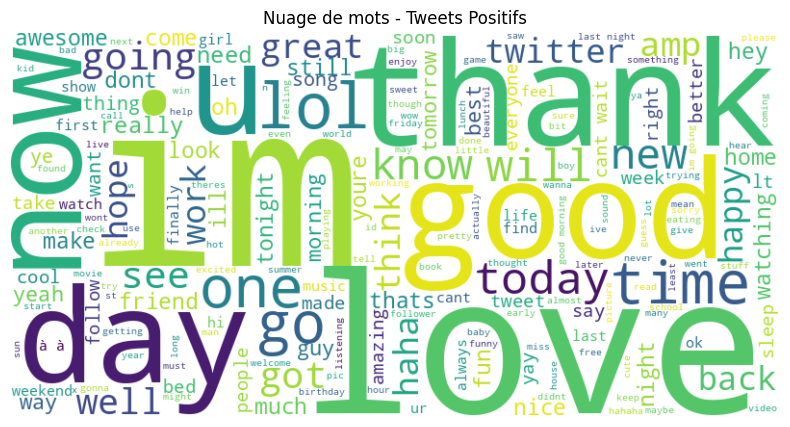

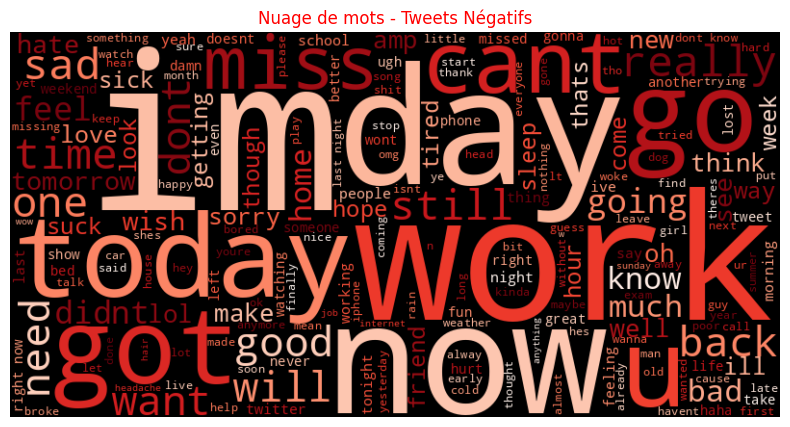

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# S√©lectionner un √©chantillon pour acc√©l√©rer la visualisation (ex. 5000 tweets par sentiment)
positive_text = " ".join(df[df["target"]==4]["clean_text"].sample(5000, random_state=42))
negative_text = " ".join(df[df["target"]==0]["clean_text"].sample(5000, random_state=42))

# Nuage de mots pour les tweets positifs
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(12, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Tweets Positifs")
plt.show()

# Nuage de mots pour les tweets n√©gatifs
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.figure(figsize=(12, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Tweets N√©gatifs", color="red")
plt.show()


In [19]:
df["clean_text"]

0          awww thats a bummer you shoulda got david carr...
1          is upset that he cant update his facebook by t...
2          i dived many times for the ball managed to sav...
3             my whole body feels itchy and like its on fire
4          no its not behaving at all im mad why am i her...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom very cool to hear old walt interview...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999                                                happy
Name: clean_text, Length: 1600000, dtype: object

## **R√©gression Logistique**

‚úÖ Accuracy optimis√©e: 81.10%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.80      0.81    160000
     Positif       0.80      0.82      0.81    160000

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



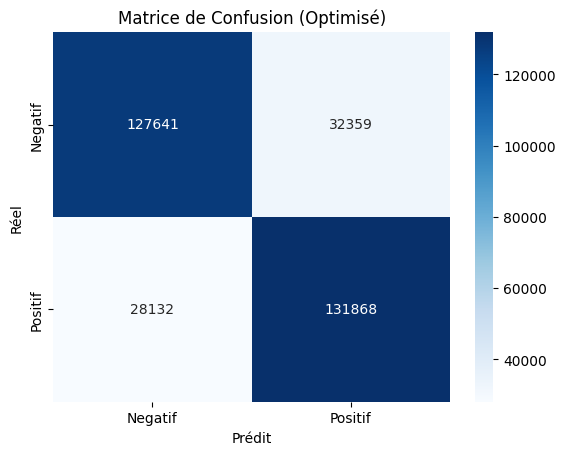

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. S√©lectionner les features et la cible
df_binary = df[df['target'].isin([0, 4])]
X_bin = df_binary['clean_text']
y_bin = df_binary['target'].map({0:0, 4:1})  # 0 = n√©gatif, 1 = positif

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

# 3. Vectorisation TF-IDF optimis√©e
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,3),
    min_df=3,
    max_df=0.9
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Mod√®le r√©gression logistique optimis√©
lr_model = LogisticRegression(
    max_iter=2000,
    C=1,
    penalty='l2',
    solver='saga',
    class_weight="balanced",
    n_jobs=-1
)
lr_model.fit(X_train_tfidf, y_train)

# 5. Pr√©dictions
y_pred = lr_model.predict(X_test_tfidf)

# 6. √âvaluation
acc = accuracy_score(y_test, y_pred)
print(f"‚úÖ Accuracy optimis√©e: {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))

# 7. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negatif","Positif"],
            yticklabels=["Negatif","Positif"])
plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion (Optimis√©)")
plt.show()


## **Exemple de Fonction de pr√©diction**

In [14]:
# 6. Fonction de pr√©diction
# ================================
def predict_sentiment(phrase):
    vect = tfidf.transform([phrase])  # transformer la phrase
    pred = lr_model.predict(vect)[0]  # pr√©dire
    proba = lr_model.predict_proba(vect)[0]  # proba [neg, pos]

    sentiment = "Positif üòÄ" if pred == 1 else "N√©gatif üò°"

    print(f"Phrase: {phrase}")
    print(f"Pr√©diction: {sentiment}")
    print(f"Probabilit√© -> N√©gatif: {proba[0]:.2f}, Positif: {proba[1]:.2f}")

In [27]:
#7. Exemples de test
# ================================
predict_sentiment("J'adore ce film, il est incroyable !")
predict_sentiment("just woke up having no school is the best feel.")
predict_sentiment("Franchement c‚Äôest moyen, pas terrible mais pas horrible non plus.")

Phrase: i feel in love
Pr√©diction: Positif üòÄ
Probabilit√© -> N√©gatif: 0.27, Positif: 0.73
Phrase: J'adore ce film, il est incroyable !
Pr√©diction: Positif üòÄ
Probabilit√© -> N√©gatif: 0.09, Positif: 0.91
Phrase: just woke up having no school is the best feel.
Pr√©diction: Positif üòÄ
Probabilit√© -> N√©gatif: 0.11, Positif: 0.89
Phrase: Franchement c‚Äôest moyen, pas terrible mais pas horrible non plus.
Pr√©diction: N√©gatif üò°
Probabilit√© -> N√©gatif: 0.97, Positif: 0.03
